In [1]:
import os
# change work directory
os.chdir(os.path.dirname(os.getcwd()))


In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from src.common.utils import load_model, load_metrics, plot_learning_curve, save_plot, save_model, save_metrics, load_cv_results, format_cv_results, plot_complexity_curve, plot_training_time
from src.common.evaluation import summarize_model, summarize_complexity_curve

In [3]:
# X_trian = np.load('data/dataset2/processed/transformer_128/X_train.npy')
# print(X_trian.shape)

# X_train = np.load('data/dataset2/processed/transformer_500/X_train.npy')
# print(X_train.shape)

# X_train = sparse.load_npz('data/dataset2/processed/tfidf/X_train.npz')
# print(X_train.shape)

In [4]:
# Constant variables
input_dir = 'results/dataset2/model_outputs'
output_dir = 'figures/dataset2'

input_dir2 =  'results/dataset2/model_outputs_bert_500'
output_dir2 = 'figures/dataset2_bert_500'

input_dir_feature_reduction = 'results/dataset2/model_outputs_bert_384'
output_dir_feature_reduction = 'figures/dataset2_bert_384'
name = 'nlp'

if not os.path.exists(output_dir):
    os.makedirs(output_dir, exist_ok=True)
if not os.path.exists(output_dir2):
    os.makedirs(output_dir2, exist_ok=True)
if not os.path.exists(output_dir_feature_reduction):
    os.makedirs(output_dir_feature_reduction, exist_ok=True)



In [5]:
# def set_plot_style():
#     plt.style.use('default')
#     sns.set_style("whitegrid")
#     plt.rcParams['figure.figsize'] = (10, 8)
#     plt.rcParams['font.size'] = 26
#     plt.rcParams['axes.labelsize'] = 27
#     plt.rcParams['axes.titlesize'] = 29
#     plt.rcParams['xtick.labelsize'] = 240
#     plt.rcParams['ytick.labelsize'] = 24
#     plt.rcParams['legend.fontsize'] = 24
#     plt.rcParams['figure.facecolor'] = 'white'

# set_plot_style()

# KNN

======== knn =========
Model loaded successfully from results/dataset2/model_outputs/knn_nlp.joblib
Metrics loaded successfully from results/dataset2/model_outputs/knn_nlp_metrics.json
the best model params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
the metrics of testing dataset: {'accuracy': 0.8214285714285714, 'precision': 0.8963730569948186, 'recall': 0.7757847533632287, 'f1': 0.8317307692307693}
Metrics loaded successfully from results/dataset2/model_outputs/knn_nlp_lc_metrics.json
Plot saved successfully at figures/dataset2/knn_lc_nlp.png
======== knn_bert_500 =========
Model loaded successfully from results/dataset2/model_outputs_bert_500/knn_nlp.joblib
Metrics loaded successfully from results/dataset2/model_outputs_bert_500/knn_nlp_metrics.json
the best model params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_ne

(KNeighborsClassifier(n_neighbors=10, weights='distance'),
 {'accuracy': 0.9005102040816326,
  'precision': 0.9259259259259259,
  'recall': 0.8968609865470852,
  'f1': 0.9111617312072893})

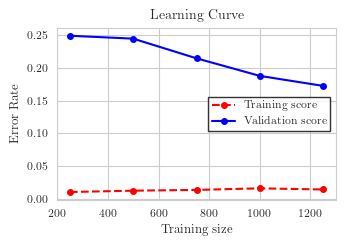

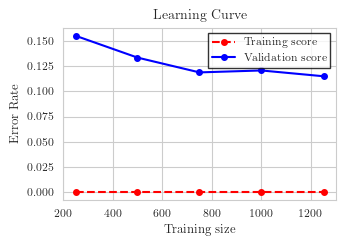

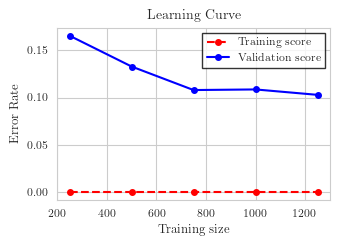

In [6]:
print('======== knn =========')
summarize_model(input_dir, output_dir, 'knn', name, 'Error Rate')
print('======== knn_bert=========')
summarize_model(input_dir2, output_dir2, 'knn', name, 'Error Rate')
print('======== knn_bert_384=========')
summarize_model(input_dir_feature_reduction, output_dir_feature_reduction, 'knn', name, 'Error Rate')

## Complexity curve

In [24]:
print('======== knn =========')
cv_results =  pd.read_csv(os.path.join(input_dir, 'knn_cv_results.csv'))
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])

print('======== knn_bert =========')
cv_results =  pd.read_csv(os.path.join(input_dir2, 'knn_cv_results.csv'))
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])
print('======== knn_bert_384 =========')
cv_results =  pd.read_csv(os.path.join(input_dir_feature_reduction, 'knn_cv_results.csv'))
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])

======== knn =========
n_neighbors                4
weights             distance
mean_fit_time       0.001097
std_fit_time         0.00068
mean_score_time     0.010936
std_score_time      0.002063
mean_test_score     0.827394
std_test_score      0.023322
mean_train_score    0.985774
std_train_score     0.001176
mean_train_error    0.014226
mean_test_error     0.172606
Name: 7, dtype: object
======== knn_bert =========
n_neighbors               10
weights             distance
mean_fit_time       0.001155
std_fit_time        0.000251
mean_score_time     0.020379
std_score_time      0.003669
mean_test_score     0.884923
std_test_score      0.013162
mean_train_score         1.0
std_train_score          0.0
mean_train_error         0.0
mean_test_error     0.115077
Name: 11, dtype: object
======== knn_bert_384 =========
n_neighbors               10
weights             distance
mean_fit_time       0.000645
std_fit_time        0.000063
mean_score_time     0.009976
std_score_time      0.002174


========= KNN vs neigbors ==============
n_neighbors               10
weights             distance
mean_fit_time       0.000645
std_fit_time        0.000063
mean_score_time     0.009976
std_score_time      0.002174
mean_test_score     0.897057
std_test_score      0.008688
mean_train_score         1.0
std_train_score          0.0
mean_train_error         0.0
mean_test_error     0.102943
Name: 11, dtype: object
Plot saved successfully at figures/dataset2_bert_384/knn_cc_n_neighbors_nlp.png
========= KNN vs weights ==============
n_neighbors               10
weights             distance
mean_fit_time       0.000645
std_fit_time        0.000063
mean_score_time     0.009976
std_score_time      0.002174
mean_test_score     0.897057
std_test_score      0.008688
mean_train_score         1.0
std_train_score          0.0
mean_train_error         0.0
mean_test_error     0.102943
Name: 11, dtype: object
Plot saved successfully at figures/dataset2_bert_384/knn_cc_weights_nlp.png


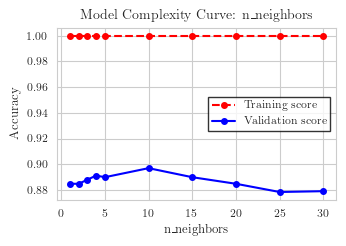

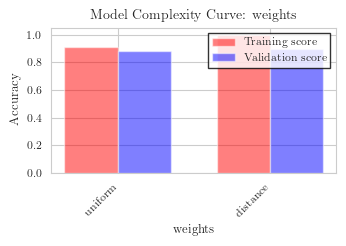

In [28]:
print('========= KNN vs neigbors ==============')
cv_results = pd.read_csv(os.path.join(input_dir_feature_reduction, 'knn_cv_results.csv'))
sub_cv_results = cv_results[cv_results['weights'] == 'distance']
plot, ax = summarize_complexity_curve(sub_cv_results, output_dir_feature_reduction, 'knn', name, 'n_neighbors', 'Accuracy')

print('========= KNN vs weights ==============')
sub_cv_results = cv_results[cv_results['n_neighbors'] == 10]
plot, ax = summarize_complexity_curve(sub_cv_results, output_dir_feature_reduction, 'knn', name, 'weights', 'Accuracy')



## Trainig time 

Plot saved successfully at figures/dataset2_bert_384/knn_training_time_neighbor_nlp.png


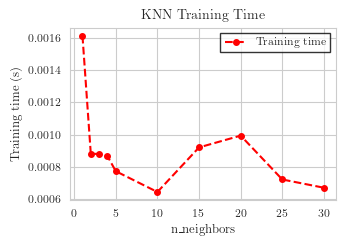

In [29]:
sub_cv_results = cv_results[cv_results['weights'] == 'distance']
plot, ax = plot_training_time(sub_cv_results, 'n_neighbors', 'KNN Training Time')
save_plot(plot, output_dir_feature_reduction, 'knn', 'training_time_neighbor', name)

Plot saved successfully at figures/dataset2_bert_384/knn_training_time_weights_nlp.png


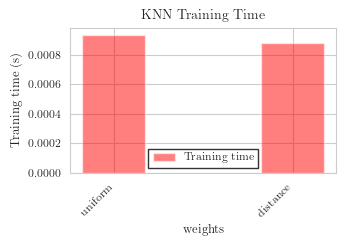

In [30]:
sub_cv_results = cv_results[cv_results['n_neighbors'] == 3]
plot, ax = plot_training_time(sub_cv_results, 'weights', 'KNN Training Time')
save_plot(plot, output_dir_feature_reduction, 'knn', 'training_time_weights', name)

# SVM

==== svm ====
Model loaded successfully from results/dataset2/model_outputs/svm_nlp.joblib
Metrics loaded successfully from results/dataset2/model_outputs/svm_nlp_metrics.json
the best model params: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 17, 'shrinking': True, 'tol': 0.001, 'verbose': False}
the metrics of testing dataset: {'accuracy': 0.8826530612244898, 'precision': 0.9682539682539683, 'recall': 0.820627802690583, 'f1': 0.8883495145631068}
Metrics loaded successfully from results/dataset2/model_outputs/svm_nlp_lc_metrics.json
Plot saved successfully at figures/dataset2/svm_lc_nlp.png
==== svm_bert_500 ====
Model loaded successfully from results/dataset2/model_outputs_bert_500/svm_nlp.joblib
Metrics loaded successfully from results/dataset2/model_outputs_bert_500/svm_nlp_metrics.json
the best model param

(SVC(random_state=17),
 {'accuracy': 0.9413265306122449,
  'precision': 0.9761904761904762,
  'recall': 0.9192825112107623,
  'f1': 0.9468822170900693})

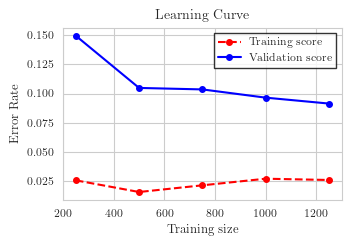

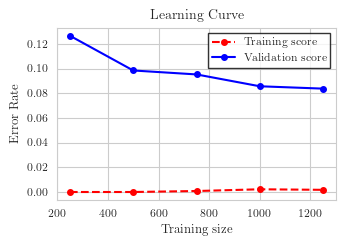

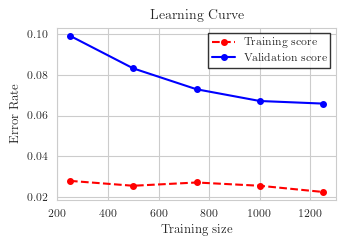

In [12]:
print('==== svm ====')
summarize_model(input_dir, output_dir, 'svm', name, 'Error Rate')
print('==== svm_bert ====')
summarize_model(input_dir2, output_dir2, 'svm', name, 'Error Rate')
print('==== svm_bert_ ====')
summarize_model(input_dir_feature_reduction, output_dir_feature_reduction, 'svm', name, 'Error Rate')

## Complexity curve

In [25]:
print('======== svm =========')
cv_results =  pd.read_csv(os.path.join(input_dir, 'svm_cv_results.csv'))
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])

print('======== svm_bert =========')
cv_results =  pd.read_csv(os.path.join(input_dir2, 'svm_cv_results.csv'))
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])
print('======== svm_bert_384 =========')
cv_results =  pd.read_csv(os.path.join(input_dir_feature_reduction, 'svm_cv_results.csv'))
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])

======== knn =========
gamma                  scale
kernel                   rbf
mean_fit_time       0.078954
std_fit_time        0.004313
mean_score_time     0.017973
std_score_time      0.002406
mean_test_score     0.908577
std_test_score      0.015019
mean_train_score    0.974106
std_train_score     0.003622
mean_train_error    0.025894
mean_test_error     0.091423
Name: 0, dtype: object
======== knn_bert =========
gamma                   0.01
kernel                  poly
mean_fit_time        0.11874
std_fit_time        0.007765
mean_score_time     0.025119
std_score_time      0.004979
mean_test_score     0.916255
std_test_score      0.013549
mean_train_score    0.998242
std_train_score     0.001375
mean_train_error    0.001758
mean_test_error     0.083745
Name: 15, dtype: object
======== knn_bert_384 =========
gamma                  scale
kernel                   rbf
mean_fit_time       0.079728
std_fit_time        0.005332
mean_score_time     0.034858
std_score_time      0.006115


==== SVM vs kernel ====
gamma                  scale
kernel                   rbf
mean_fit_time       0.079728
std_fit_time        0.005332
mean_score_time     0.034858
std_score_time      0.006115
mean_test_score     0.934155
std_test_score      0.015433
mean_train_score    0.977462
std_train_score     0.002223
mean_train_error    0.022538
mean_test_error     0.065845
Name: 0, dtype: object
Plot saved successfully at figures/dataset2_bert_384/svm_cc_kernel_nlp.png
==== SVM vs gamma ====
gamma                  scale
kernel                   rbf
mean_fit_time       0.079728
std_fit_time        0.005332
mean_score_time     0.034858
std_score_time      0.006115
mean_test_score     0.934155
std_test_score      0.015433
mean_train_score    0.977462
std_train_score     0.002223
mean_train_error    0.022538
mean_test_error     0.065845
Name: 0, dtype: object
Plot saved successfully at figures/dataset2_bert_384/svm_cc_gamma_nlp.png


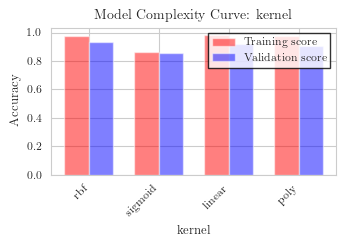

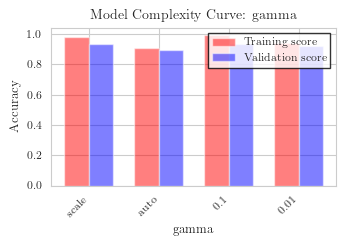

In [31]:
cv_results = pd.read_csv(os.path.join(input_dir_feature_reduction, 'svm_cv_results.csv'))
print('==== SVM vs kernel ====')
sub_cv_results = cv_results[cv_results['gamma'] == 'scale']
plot, ax = summarize_complexity_curve(sub_cv_results, output_dir_feature_reduction, 'svm', name, 'kernel', 'Accuracy')

print('==== SVM vs gamma ====')
sub_cv_results = cv_results[cv_results['kernel'] == 'rbf']
plot, ax = summarize_complexity_curve(sub_cv_results, output_dir_feature_reduction, 'svm', name, 'gamma', 'Accuracy')

## Training time

Plot saved successfully at figures/dataset2_bert_384/svm_training_time_gamma_nlp.png
Plot saved successfully at figures/dataset2_bert_384/svm_training_time_kernel_nlp.png


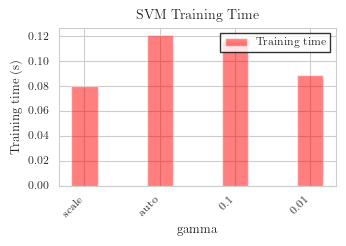

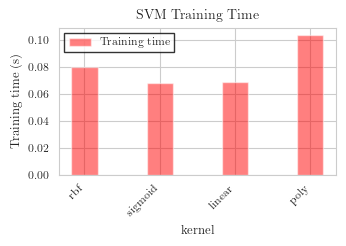

In [32]:
sub_cv_results = cv_results[cv_results['kernel'] == 'rbf']
plot, ax = plot_training_time(sub_cv_results, 'gamma', 'SVM Training Time')
save_plot(plot, output_dir_feature_reduction, 'svm', 'training_time_gamma', name)

sub_cv_results = cv_results[cv_results['gamma'] == 'scale']
plot, ax = plot_training_time(sub_cv_results, 'kernel', 'SVM Training Time')
save_plot(plot, output_dir_feature_reduction, 'svm', 'training_time_kernel', name)


# Neural Network

==== nn ====
Model loaded successfully from results/dataset2/model_outputs/nn_nlp.joblib
Metrics loaded successfully from results/dataset2/model_outputs/nn_nlp_metrics.json
the best model params: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': [250, 100], 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 17, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
the metrics of testing dataset: {'accuracy': 0.8801020408163265, 'precision': 0.8963963963963963, 'recall': 0.8923766816143498, 'f1': 0.8943820224719101}
Metrics loaded successfully from results/dataset2/model_outputs/nn_nlp_lc_metrics.json
Plot saved successfully at figures/dataset2/nn_lc_nlp.png
==== nn_bert_500 ====

(MLPClassifier(early_stopping=True, hidden_layer_sizes=[100],
               learning_rate='adaptive', learning_rate_init=0.06,
               random_state=17),
 {'accuracy': 0.9260204081632653,
  'precision': 0.98989898989899,
  'recall': 0.8789237668161435,
  'f1': 0.9311163895486936})

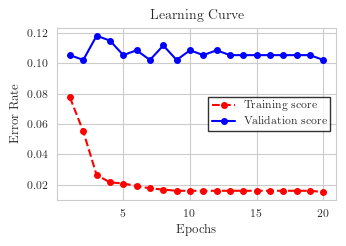

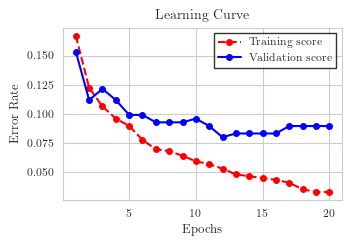

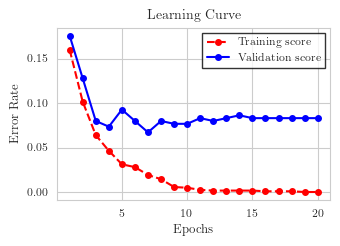

In [14]:
print('==== nn ====')
summarize_model(input_dir, output_dir, 'nn', name)

print('==== nn_bert====')
summarize_model(input_dir2, output_dir2, 'nn', name)

print('==== nn_bert_384====')
summarize_model(input_dir_feature_reduction, output_dir_feature_reduction, 'nn', name)

## Complexity curve

In [26]:
print('======== nn =========')
cv_results =  pd.read_csv(os.path.join(input_dir, 'nn_cv_results.csv'))
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])
print('======== nn_bert =========')
cv_results =  pd.read_csv(os.path.join(input_dir2, 'nn_cv_results.csv'))
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])
print('======== nn_bert_384 =========')
cv_results =  pd.read_csv(os.path.join(input_dir_feature_reduction, 'nn_cv_results.csv'))
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])

======== nn =========
hidden_layer_sizes    [250, 100]
learning_rate           adaptive
learning_rate_init          0.01
mean_fit_time           0.468074
std_fit_time            0.168695
mean_score_time         0.001506
std_score_time          0.000889
mean_test_score         0.889404
std_test_score          0.017012
mean_train_score        0.952522
std_train_score          0.02025
mean_train_error        0.047478
mean_test_error         0.110596
Name: 139, dtype: object
======== nn_bert =========
hidden_layer_sizes       [100]
learning_rate         adaptive
learning_rate_init       0.001
mean_fit_time         0.312841
std_fit_time          0.042565
mean_score_time       0.001234
std_score_time        0.000551
mean_test_score       0.917523
std_test_score        0.004172
mean_train_score       0.95972
std_train_score       0.008279
mean_train_error       0.04028
mean_test_error       0.082477
Name: 21, dtype: object
======== nn_bert_384 =========
hidden_layer_sizes       [100]
learning

In [33]:
cv_results = pd.read_csv(os.path.join(input_dir_feature_reduction, 'nn_cv_results.csv')) 
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])

hidden_layer_sizes       [100]
learning_rate         adaptive
learning_rate_init        0.06
mean_fit_time         0.113481
std_fit_time          0.022385
mean_score_time       0.000967
std_score_time        0.000438
mean_test_score       0.931599
std_test_score        0.013141
mean_train_score      0.978425
std_train_score       0.013257
mean_train_error      0.021575
mean_test_error       0.068401
Name: 52, dtype: object


==== nn ====


/var/folders/8m/ddcyb_xx6hx0nx6yr5msflfm0000gn/T/ipykernel_47700/3366992170.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_cv_results['node_size'] = np.arange(1, sub_cv_results.shape[0]+1)


Plot saved successfully at figures/dataset2_bert_384/nn_hidden_layer_sizes_nlp.png


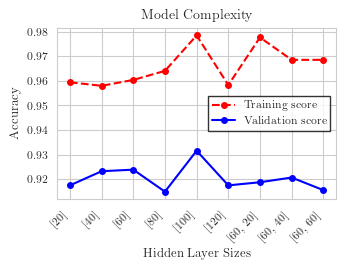

In [34]:
# draw
print('==== nn ====')
sub_cv_results = cv_results[cv_results['learning_rate_init'] ==0.06]

# turn the hidden_layer_sizes into number first and second hidden layer size
sub_cv_results['node_size'] = np.arange(1, sub_cv_results.shape[0]+1)
lr_plt, ax= plot_complexity_curve(sub_cv_results, 'node_size','mean_train_score', 'mean_test_score', 'Model Complexity', 'Accuracy')
# set the x ticks
ax.set_xticks(sub_cv_results['node_size'])
ax.set_xticklabels(sub_cv_results['hidden_layer_sizes'], rotation=45, ha='right')
ax.set_xlabel('Hidden Layer Sizes')
# save the plot
save_plot(lr_plt, output_dir_feature_reduction, 'nn', 'hidden_layer_sizes', name)


Plot saved successfully at figures/dataset2_bert_384/nn_training_time_hidden_layer_sizes_nlp.png


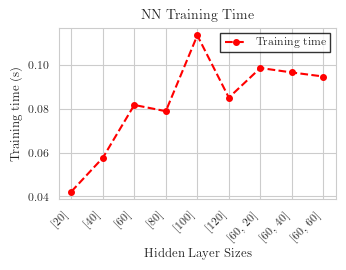

In [35]:
plot, ax = plot_training_time(sub_cv_results, 'node_size', 'NN Training Time')
# set the x ticks

ax.set_xticks(sub_cv_results['node_size'])
ax.set_xticklabels(sub_cv_results['hidden_layer_sizes'], rotation=45, ha='right')
ax.set_xlabel('Hidden Layer Sizes')
# save
save_plot(plot, output_dir_feature_reduction, 'nn', 'training_time_hidden_layer_sizes', name)

==== nn ====
hidden_layer_sizes       [100]
learning_rate         adaptive
learning_rate_init        0.06
mean_fit_time         0.113481
std_fit_time          0.022385
mean_score_time       0.000967
std_score_time        0.000438
mean_test_score       0.931599
std_test_score        0.013141
mean_train_score      0.978425
std_train_score       0.013257
mean_train_error      0.021575
mean_test_error       0.068401
Name: 52, dtype: object
Plot saved successfully at figures/dataset2_bert_384/nn_cc_learning_rate_init_nlp.png
Plot saved successfully at figures/dataset2_bert_384/nn_training_time_learning_rate_init_nlp.png


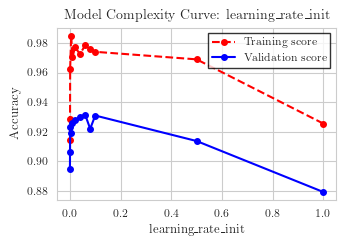

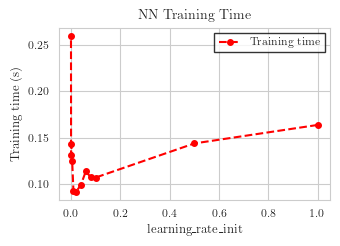

In [39]:
# draw
print('==== nn ====')
sub_cv_results = cv_results[cv_results['hidden_layer_sizes'] =='[100]']
summarize_complexity_curve(sub_cv_results, output_dir_feature_reduction, 'nn', name, 'learning_rate_init', 'Accuracy')

plot, ax = plot_training_time(sub_cv_results, 'learning_rate_init', 'NN Training Time')
save_plot(plot, output_dir_feature_reduction, 'nn', 'training_time_learning_rate_init', name)

# Boosting

## learning curve

==== boosting ====
Model loaded successfully from results/dataset2/model_outputs/boosting_nlp.joblib
Metrics loaded successfully from results/dataset2/model_outputs/boosting_nlp_metrics.json
the best model params: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_iter_no_change': None, 'random_state': 17, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
the metrics of testing dataset: {'accuracy': 0.8877551020408163, 'precision': 0.9685863874345549, 'recall': 0.8295964125560538, 'f1': 0.893719806763285}
Metrics loaded successfully from results/dataset2/model_outputs/boosting_nlp_lc_metrics.json
Plot saved successfully at figures/dataset2/boosting_lc_nlp.png
==== boosting_bert_500 ====
Model loa

(GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=17),
 {'accuracy': 0.9056122448979592,
  'precision': 0.9386792452830188,
  'recall': 0.8923766816143498,
  'f1': 0.9149425287356322})

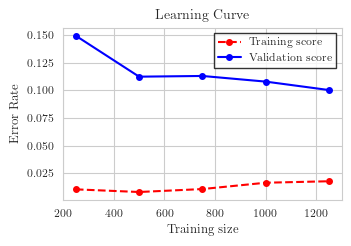

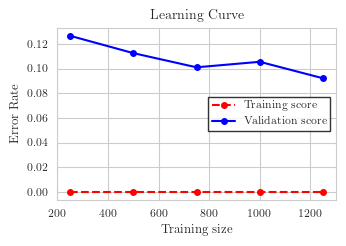

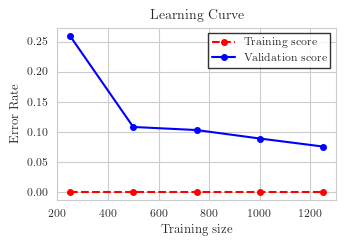

In [21]:
print('==== boosting ====')
summarize_model(input_dir, output_dir, 'boosting', name, 'Error Rate')

print('==== boosting_bert_500 ====')
summarize_model(input_dir2, output_dir2, 'boosting', name, 'Error Rate')

print('==== boosting_bert_384====')
summarize_model(input_dir_feature_reduction, output_dir_feature_reduction, 'boosting', name, 'Error Rate')

## Complexity curve

In [27]:
print('======== boosting =========')
cv_results =  pd.read_csv(os.path.join(input_dir, 'boosting_cv_results.csv'))
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])
print('======== boosting_bert =========')
cv_results =  pd.read_csv(os.path.join(input_dir2, 'boosting_cv_results.csv'))
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])
print('======== boosting_bert_384 =========')
cv_results =  pd.read_csv(os.path.join(input_dir_feature_reduction, 'boosting_cv_results.csv'))
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])

======== boosting =========
max_depth           10.000000
n_estimators        50.000000
mean_fit_time        0.491730
std_fit_time         0.012358
mean_score_time      0.001391
std_score_time       0.000881
mean_test_score      0.900268
std_test_score       0.012764
mean_train_score     0.982258
std_train_score      0.002874
mean_train_error     0.017742
mean_test_error      0.099732
Name: 0, dtype: float64
======== boosting_bert =========
max_depth             3.000000
n_estimators        250.000000
mean_fit_time        58.160522
std_fit_time          0.431019
mean_score_time       0.001791
std_score_time        0.000077
mean_test_score       0.909861
std_test_score        0.012766
mean_train_score      1.000000
std_train_score       0.000000
mean_train_error      0.000000
mean_test_error       0.090139
Name: 4, dtype: float64
======== boosting_bert_384 =========
max_depth             5.000000
n_estimators        200.000000
mean_fit_time        36.657964
std_fit_time          0.11655

In [40]:
cv_results_df = pd.read_csv(os.path.join(input_dir_feature_reduction, 'boosting_cv_results.csv'))
print(cv_results_df.loc[cv_results_df['mean_test_score'].idxmax()])

max_depth             5.000000
n_estimators        200.000000
mean_fit_time        36.657964
std_fit_time          0.116559
mean_score_time       0.003137
std_score_time        0.000662
mean_test_score       0.925199
std_test_score        0.009978
mean_train_score      1.000000
std_train_score       0.000000
mean_train_error      0.000000
mean_test_error       0.074801
Name: 8, dtype: float64


max_depth             5.000000
n_estimators        200.000000
mean_fit_time        36.657964
std_fit_time          0.116559
mean_score_time       0.003137
std_score_time        0.000662
mean_test_score       0.925199
std_test_score        0.009978
mean_train_score      1.000000
std_train_score       0.000000
mean_train_error      0.000000
mean_test_error       0.074801
Name: 8, dtype: float64
Plot saved successfully at figures/dataset2_bert_384/boosting_cc_n_estimators_nlp.png
Plot saved successfully at figures/dataset2_bert_384/boosting_training_time_n_estimators_nlp.png
max_depth             5.000000
n_estimators        200.000000
mean_fit_time        36.657964
std_fit_time          0.116559
mean_score_time       0.003137
std_score_time        0.000662
mean_test_score       0.925199
std_test_score        0.009978
mean_train_score      1.000000
std_train_score       0.000000
mean_train_error      0.000000
mean_test_error       0.074801
Name: 8, dtype: float64
Plot saved successfully a

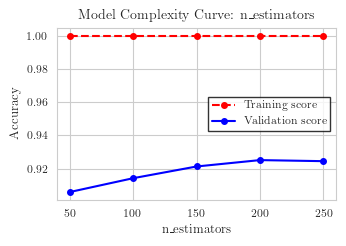

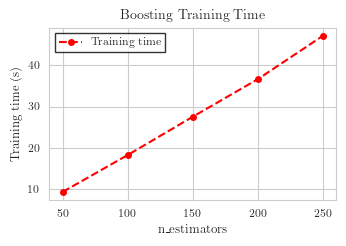

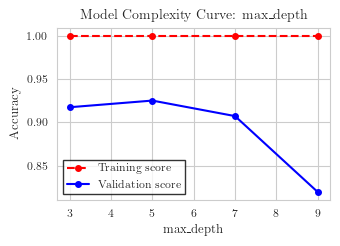

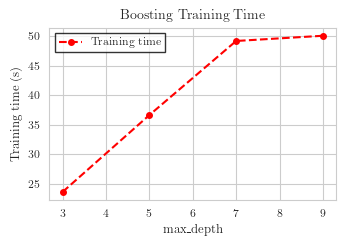

In [41]:
sub_cv_results_df = cv_results_df[(cv_results_df['max_depth'] == 5)]
cc_plt, ax =  summarize_complexity_curve(sub_cv_results_df, output_dir_feature_reduction, 'boosting', name, 'n_estimators',  'Accuracy')
# draw the training time
plot, _ = plot_training_time(sub_cv_results_df, 'n_estimators', 'Boosting Training Time')
# save
save_plot(plot, output_dir_feature_reduction, 'boosting', 'training_time_n_estimators', name)

sub_cv_results_df = cv_results_df[(cv_results_df['n_estimators'] == 200)]
cc_plt, ax =  summarize_complexity_curve(sub_cv_results_df, output_dir_feature_reduction, 'boosting', name, 'max_depth',  'Accuracy')
# draw the training time
plot, _ = plot_training_time(sub_cv_results_df, 'max_depth', 'Boosting Training Time')
# save
save_plot(plot, output_dir_feature_reduction, 'boosting', 'training_time_max_depth', name)

# More Analysis

This section we further study KNN and NN with more hyperparameters tuning and analysis.

## KNN